In [237]:
#Import tools and dataset. "%matplotlib inline" indicates the charts drawn will be displayed in notebook
#using pip (or conda if using anaconda) install pandas seaborn matplotlib
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as map
import numpy as np
from sklearn import preprocessing as preprocessing #This is Label Encoder
%matplotlib inline
data = pd.read_pickle(r"D:\turnover_data\turnover_data_clean.pkl")

In [238]:
data.info()
data.head(5)
#Summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 48168 to 49652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   EmployeeID           1485 non-null   int64         
 1   recorddate_key       1485 non-null   datetime64[ns]
 2   birthdate_key        1485 non-null   datetime64[ns]
 3   orighiredate_key     1485 non-null   datetime64[ns]
 4   terminationdate_key  1485 non-null   datetime64[ns]
 5   age                  1485 non-null   int64         
 6   length_of_service    1485 non-null   int64         
 7   city_name            1485 non-null   object        
 8   department_name      1485 non-null   object        
 9   store_name           1485 non-null   string        
 10  gender_short         1485 non-null   object        
 11  gender_full          1485 non-null   object        
 12  termreason_desc      1485 non-null   object        
 13  termtype_desc        1485 no

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,job_title
48168,1338,2009-02-01,1949-02-16,1989-09-20,2009-02-16,60,19,Vancouver,Training,35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,Director
48169,1339,2014-02-01,1949-02-19,1989-09-22,2014-02-19,65,24,Nelson,Store Management,19,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,Store Manager
48170,1340,2009-02-01,1949-02-19,1989-09-22,2009-02-19,60,19,Kelowna,Store Management,16,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,Store Manager
48171,1341,2009-02-01,1949-02-21,1989-09-23,2009-02-21,60,19,Vancouver,Labor Relations,35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,Director
48172,1343,2014-02-01,1949-02-24,1989-09-25,2014-02-24,65,24,Victoria,Store Management,37,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,Store Manager


In [239]:
data.describe()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,STATUS_YEAR
count,1485.000000,1485,1485,1485,1485,1485.000000,1485.000000,1485.000000
mean,4462.058586,2011-03-22 20:42:10.909090816,1959-08-24 18:34:10.909090880,1999-06-03 23:22:10.909091072,2011-04-08 20:34:25.454545408,51.458586,11.364310,2010.683502
min,1338.000000,2006-01-01 00:00:00,1941-01-15 00:00:00,1989-09-20 00:00:00,2006-01-01 00:00:00,19.000000,0.000000,2006.000000
25%,2853.000000,2008-06-01 00:00:00,1946-07-07 00:00:00,1994-02-01 00:00:00,2008-06-06 00:00:00,34.000000,7.000000,2008.000000
50%,4400.000000,2011-02-01 00:00:00,1949-09-05 00:00:00,1998-05-26 00:00:00,2011-02-14 00:00:00,60.000000,13.000000,2011.000000
75%,6236.000000,2014-08-01 00:00:00,1978-11-15 00:00:00,2005-06-06 00:00:00,2014-08-10 00:00:00,65.000000,13.000000,2014.000000
max,8321.000000,2015-12-01 00:00:00,1994-11-28 00:00:00,2013-11-24 00:00:00,2015-12-30 00:00:00,65.000000,25.000000,2015.000000
std,2047.887986,NaN,NaN,NaN,NaN,16.517750,6.736767,3.002610


In [240]:
data[['length_of_service','age']].mean()
# Insights:Employees who left the company on average have worked for 11.4 years, their age are around 51 years old.

length_of_service    11.364310
age                  51.458586
dtype: float64

Text(0.5, 1.0, 'Number of Employees Left respective to their Years of Service')

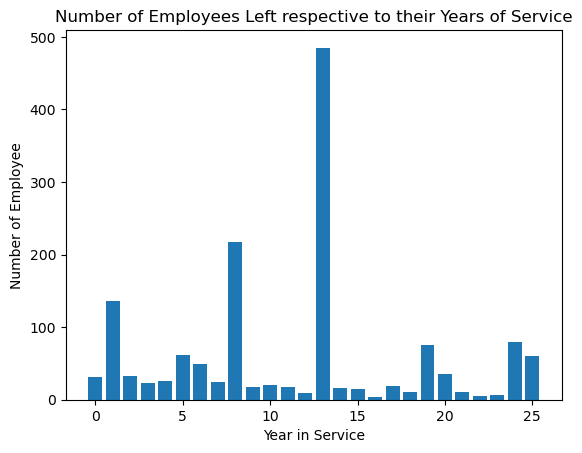

In [241]:
# Barplot for distribution in length of service
length_of_service = data.groupby('length_of_service').count() #Create a separate DataFrame that groups into length_of_service
map.bar(length_of_service.index.values, length_of_service["EmployeeID"]) # Drawing bar chart using the created dataframe,
# ".index.values" will first index the dataframe, then extract the values
map.xlabel("Year in Service") 
map.ylabel("Number of Employee")
map.title("Number of Employees Left respective to their Years of Service")

# Insight: Most of the employees left after 13 years of service, there are gaps between 1-8 and 8-13.


Text(0.5, 1.0, 'Distribution of Employees Left in Age')

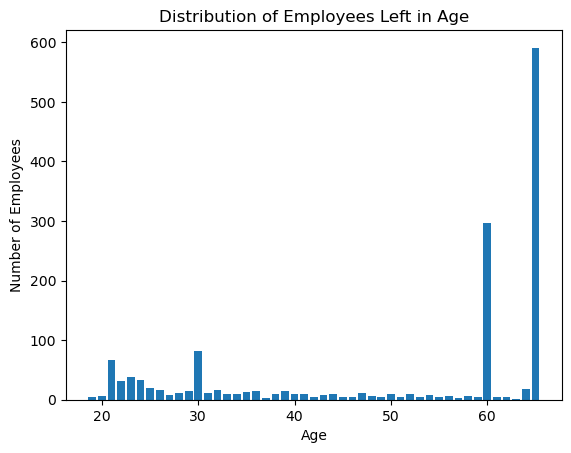

In [242]:
#  Bar plot for age distribution
age = data.groupby("age").count()
map.bar(age.index.values, age["EmployeeID"])
map.xlabel("Age")
map.ylabel("Number of Employees")
map.title("Distribution of Employees Left in Age")
#Majority of employees left at 21, 30, 60, and 65 years old.


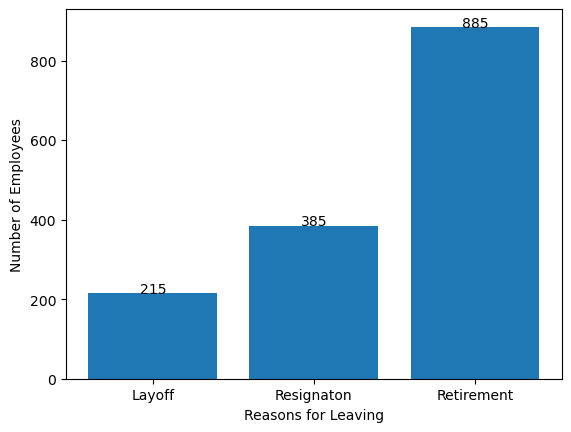

In [243]:
# Bar plot for termreason
termreason = data.groupby('termreason_desc').count()
map.bar(termreason.index.values, termreason["EmployeeID"])
map.xlabel("Reasons for Leaving")
map.ylabel("Number of Employees")
for i in range (len(termreason["EmployeeID"])):
    map.text(i, termreason["EmployeeID"][i], termreason["EmployeeID"][i], ha = 'center')
    
#Of total number of employees left, retirement is the major reason.

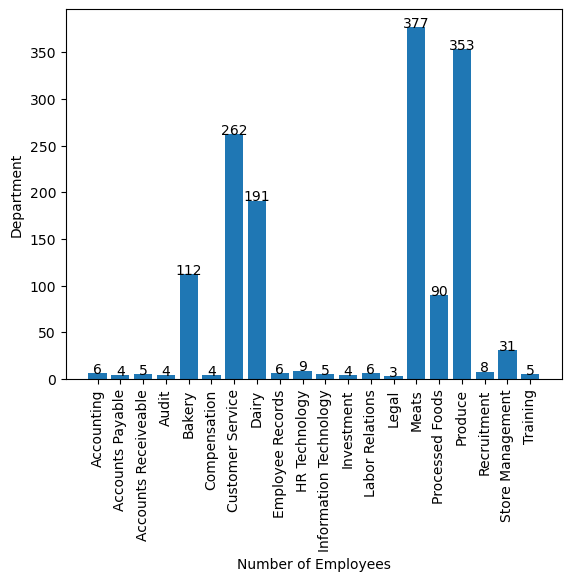

In [244]:
# Bar plot for distribution in department
department_name = data.groupby('department_name').count()
map.bar(department_name.index.values,department_name["EmployeeID"])
map.xlabel("Number of Employees")
map.ylabel("Department")
map.xticks(rotation=90)
for i in range(len(department_name["EmployeeID"])):
    map.text(i, department_name["EmployeeID"][i], department_name["EmployeeID"][i], ha = 'center')

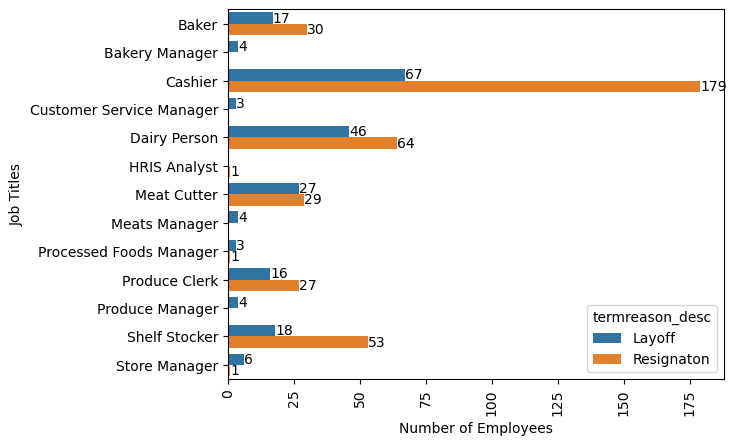

In [245]:
# Bar plot for distribution of job title, with termreason other than "Retirement"
index_def = data[data["termreason_desc"]=='Retirement'].index # Create a dataframe that chooses only "Retirement" within termreason_desc
data2 = data.drop(index_def) # Filter out data using the created dataset, plus create a new dataset to avoid messing the original
termreason2 = data2.groupby(["job_title", "termreason_desc"]).count() # Group by with multiple columns
termreason2 = termreason2.reset_index() # Reset index to count from 1
ax = sb.barplot(y = "job_title", x="EmployeeID", hue="termreason_desc", data = termreason2, orient = "h") # Create a barplot. 
# "hue" will create legends, while orient = "h" means a horizontal barplot
map.xlabel("Number of Employees")
map.ylabel("Job Titles")
map.xticks(rotation=90)
for label in ax.containers:
    ax.bar_label(label)
    
# Insights: When taking out Retirement for termreason, employees resign more often when they do manual jobs.

C:\Users\ahron\AppData\Local\Temp\ipykernel_14304\2119608713.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  map.subplot(5,2,i+1)# This means the charts will be drawn in 4 rows, each row 2 charts, order of position will be list's index plus 1.


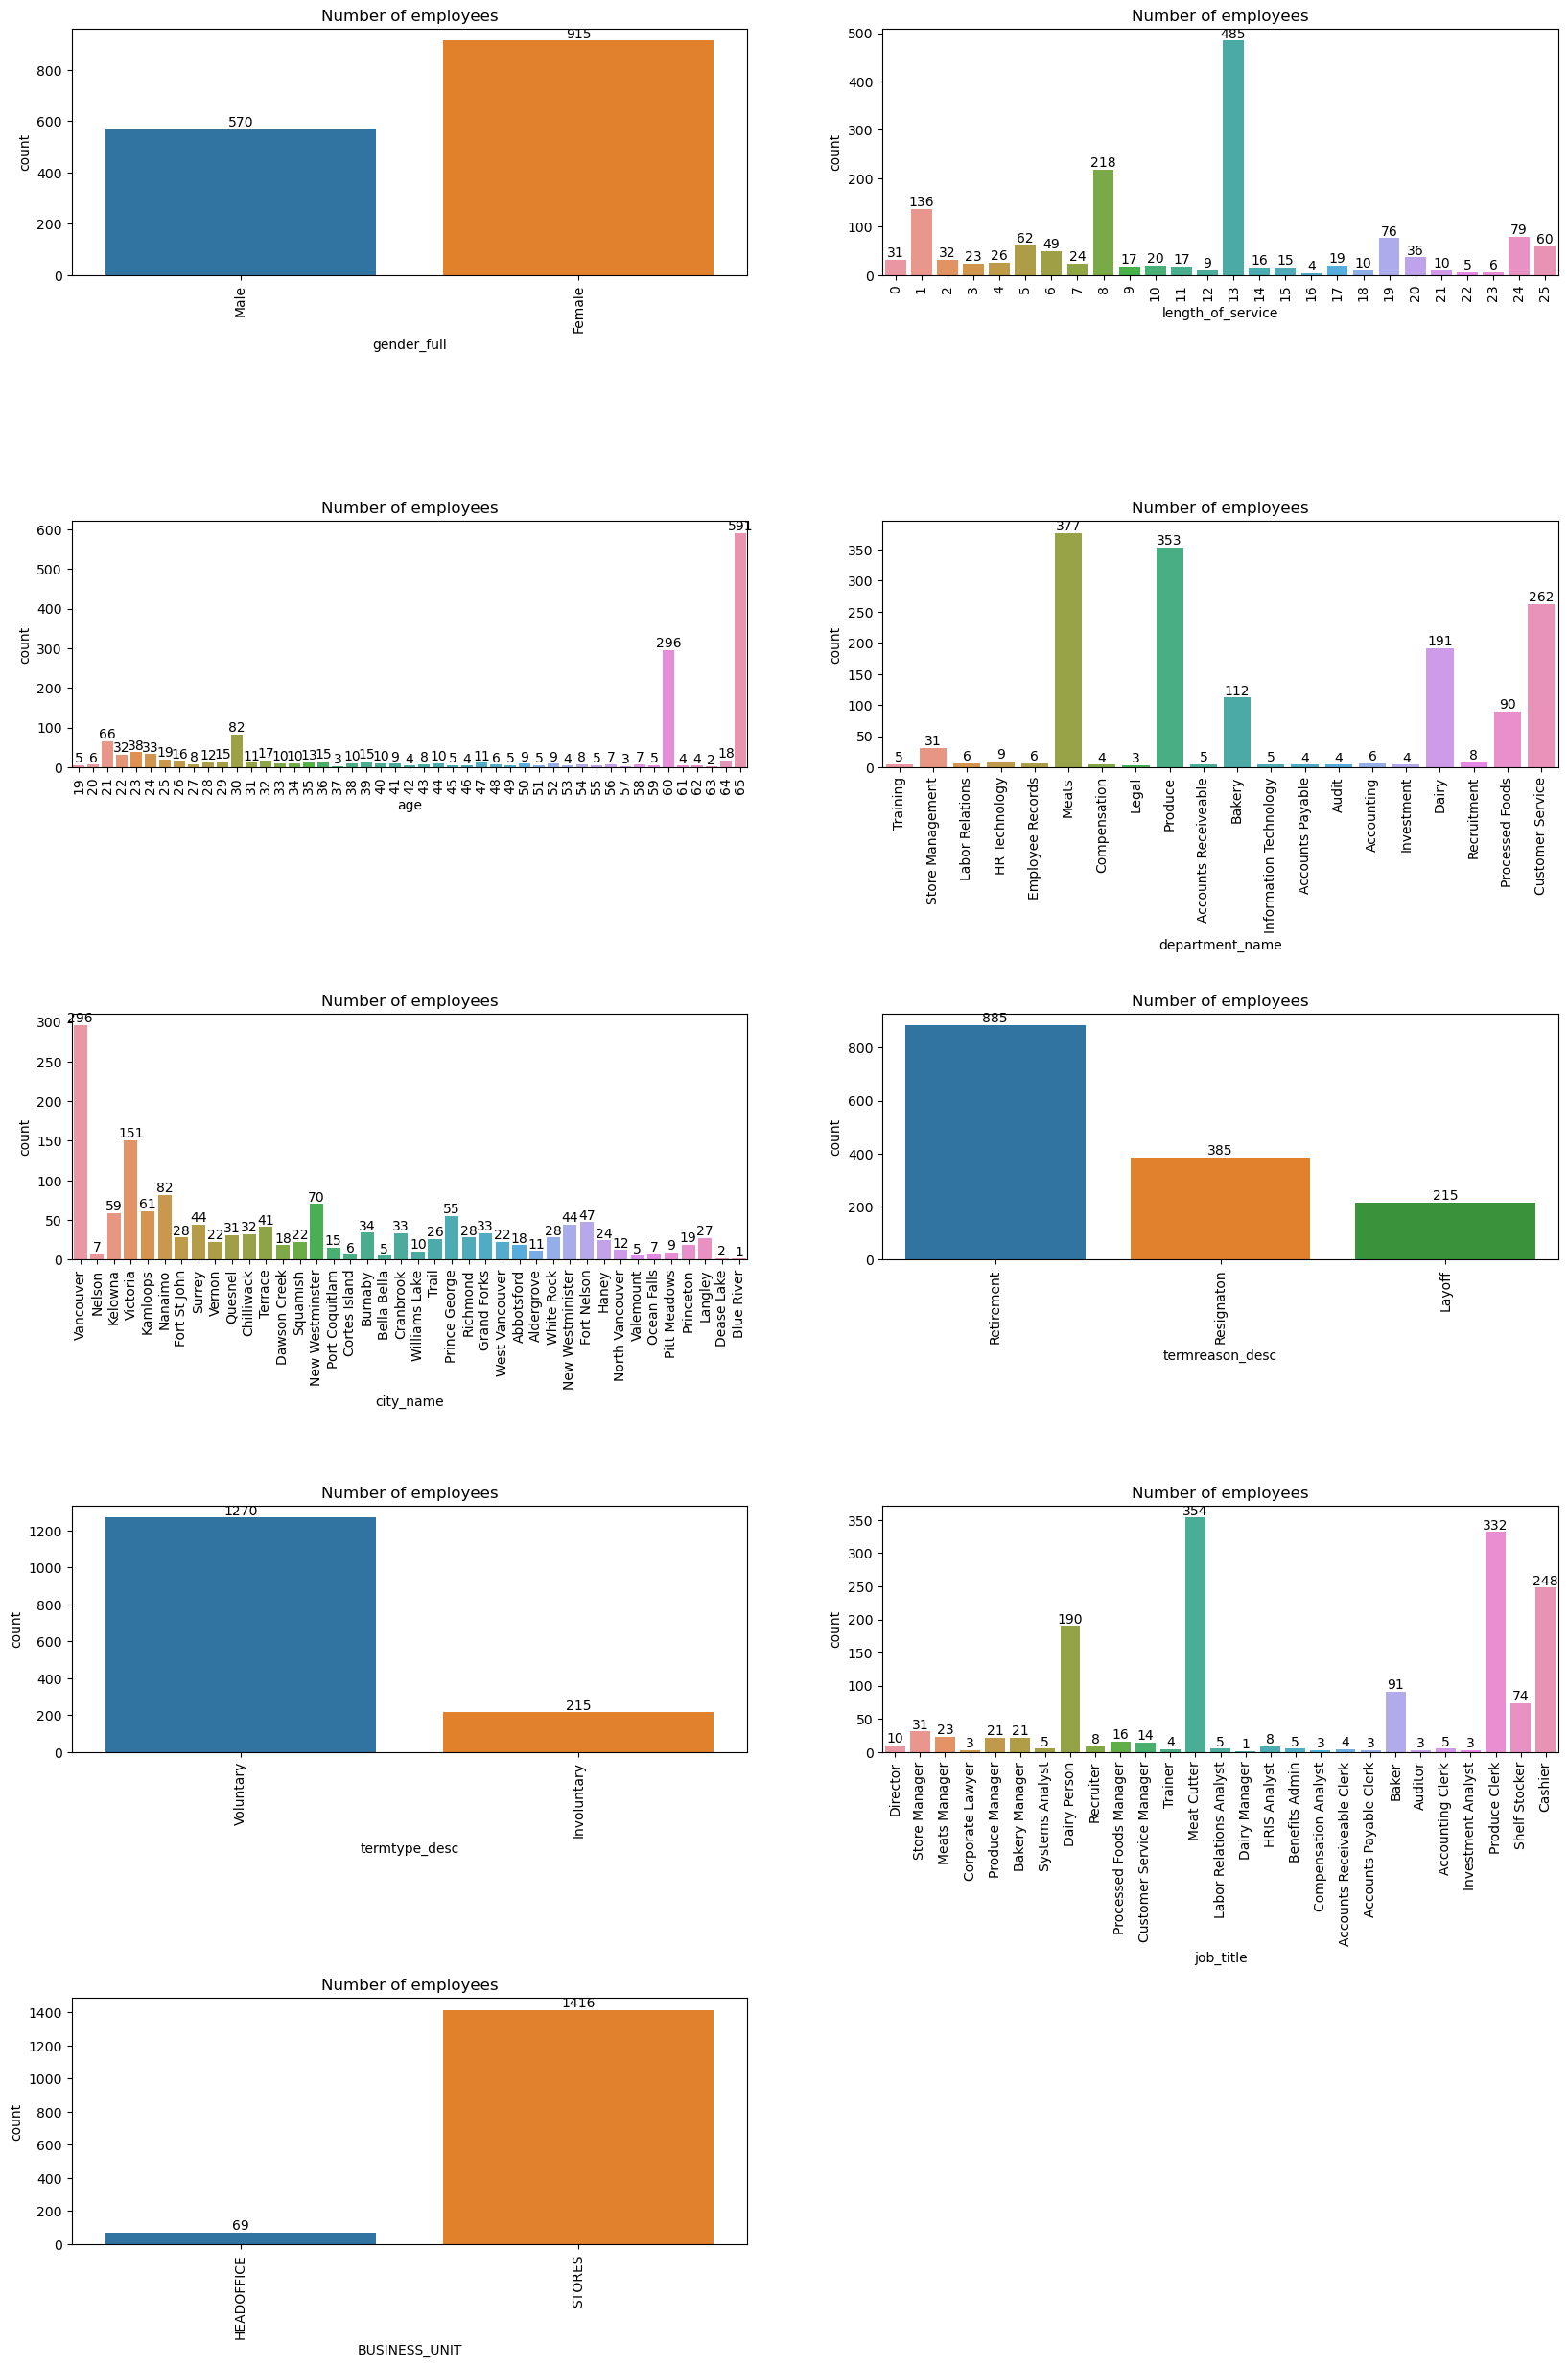

In [246]:
# A summary of plots
variables = ['gender_full','length_of_service','age','department_name','city_name','termreason_desc','termtype_desc','job_title','BUSINESS_UNIT'] #Creating a list with columns in data to draw x-axis
fig = map.subplots(figsize=(20,30)) #Dictating the width of each plot
for i,j in enumerate(variables):# this will go to each columns in the variable list, extracting the index and string from variables
    map.subplot(5,2,i+1)# This means the charts will be drawn in 4 rows, each row 2 charts, order of position will be list's index plus 1.
    map.subplots_adjust(hspace = 1.0) #space between subplots will be 1.0
    ax = sb.countplot(x=j, data=data) #drawing vertical barplots, x axis will be string from the list, dataset will be from our data
    map.xticks(rotation=90) #Rotating x labels into vertical
    map.title("Number of employees")
    for label in ax.containers: #for each defined label in established "ax"'s contained values.
        ax.bar_label(label)
        
    # OLD METHOD: 
    # sb.countplot(x=j, data=data.sort_values(j))   
    # list = data.groupby(j).count().values
    # for a in range(len(list)):
    #     map.text(a, list.values[a][0], list.values[a][0], ha = 'center')
    
    # Insight:
    # For every 3 employees who left, 2 of them are females
    # Most employees left have served around 8-13 years in company
    # For the data that range from 2009-2014, most employees left when they reach 60 years of age.
    # Overall, the departments that require manual labor saw the most employees left.
    # Retirement is the primary reason to leave, this correlates with the employee's age upon leaving
    # Employees who were laid off constitutes 14% of total number
    
        

In [275]:
# Creating Label Encoder
el = preprocessing.LabelEncoder()

# Converting string labels into numbers:
data['department_name']=el.fit_transform(data["department_name"])
data['job_title'] = el.fit_transform(data['job_title'])
data['termreason_desc'] = el.fit_transform(data['termreason_desc'])
data['termtype_desc'] = el.fit_transform(data['termtype_desc'])
data['city_name'] = el.fit_transform(data['city_name'])

# Calculating correlation:
length = data.groupby('length_of_service').count().reset_index()
length.corr()
# Although figured out how to calculate correlation, the calculated correlation indicates that there are very weak relationship 
# between the chosen variable and number of employees terminated.

,length_of_service,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,city_name,department_name,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,job_title
length_of_service,1.000000,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999,-0.088999
EmployeeID,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
recorddate_key,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
birthdate_key,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
orighiredate_key,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
terminationdate_key,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
city_name,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
department_name,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
store_name,-0.088999,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
